**Data Description After Eliminating 'NOT APPLICABLE' Values**
                Year       Economy Economy Label  Absolute value in thousands  \
count   29026.000000  29026.000000         29026                 2.902600e+04   
unique           NaN           NaN           312                          NaN   
top              NaN           NaN   Afghanistan                          NaN   
freq             NaN           NaN           101                          NaN   
mean     2001.223283   1117.715703           NaN                 2.761754e+05   
std        29.039084   1571.632758           NaN                 8.983776e+05   
min      1950.000000      0.000000           NaN                 5.100000e-01   
25%      1976.000000    270.000000           NaN                 6.305602e+02   
50%      2002.000000    558.000000           NaN                 8.600323e+03   
75%      2026.000000    840.000000           NaN                 6.514000e+04   
max      2050.000000   5706.000000           N

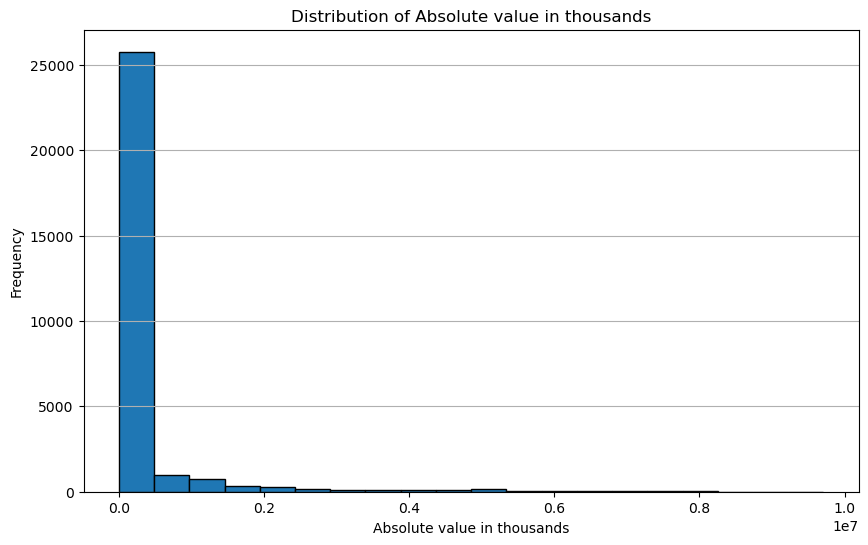

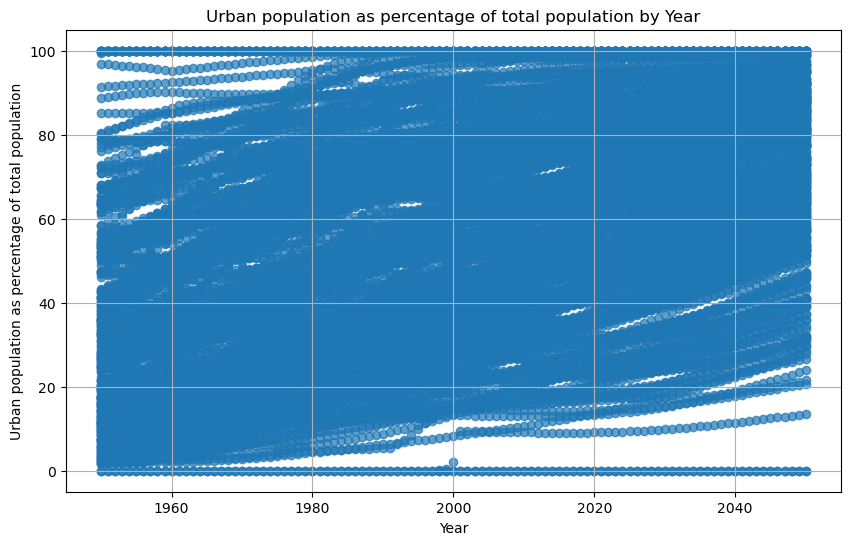

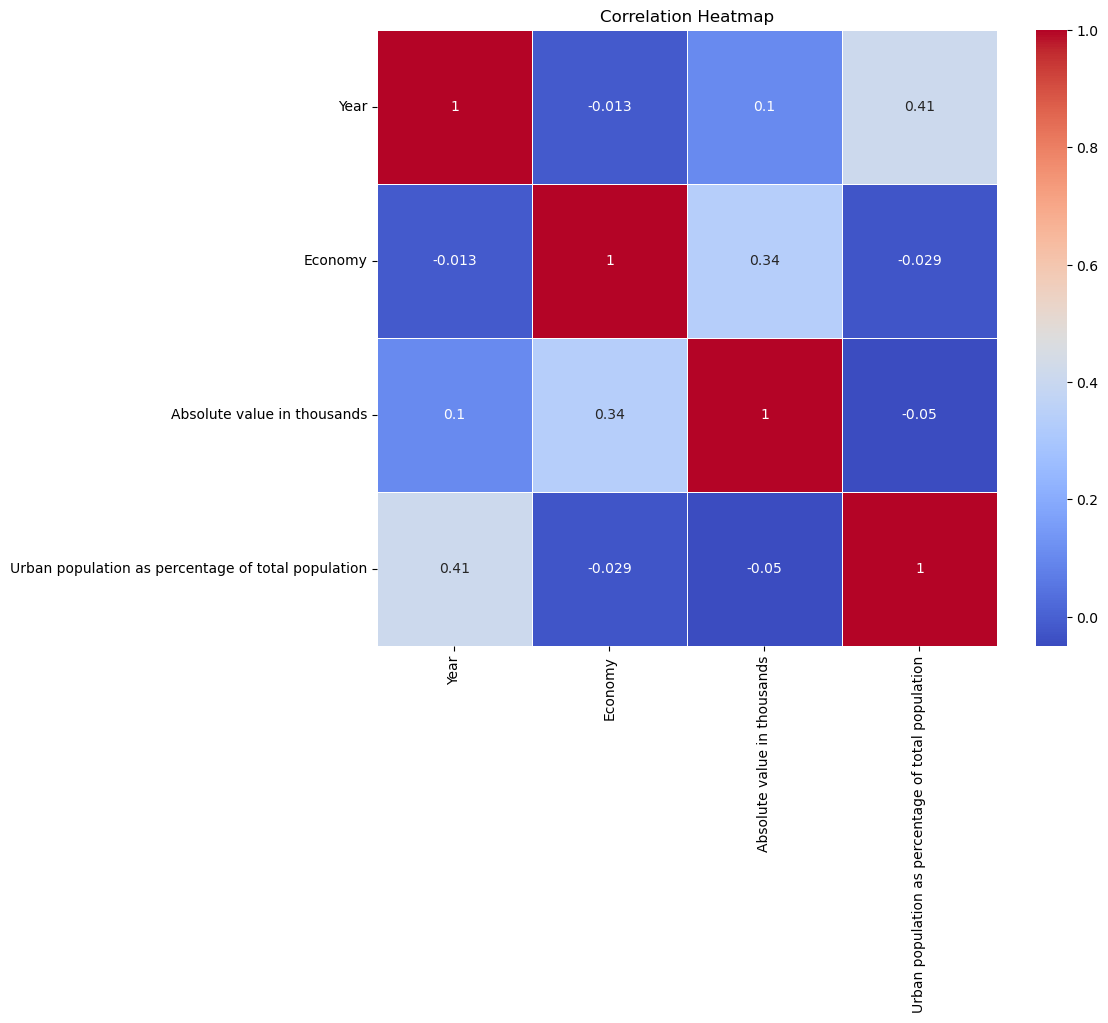

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load the dataset from the specified file path, replace 'NOT APPLICABLE' with pd.NA,
    and drop rows with missing values.
    """
    df = pd.read_csv(file_path)
    df.replace("NOT APPLICABLE", pd.NA, inplace=True)
    df_cleaned = df.dropna()
    return df_cleaned

def convert_to_numeric(data_frame, columns):
    """
    Convert specified columns to numeric type, coercing errors.
    """
    for col in columns:
        try:
            data_frame[col] = pd.to_numeric(data_frame[col], errors='coerce')
        except ValueError as e:
            print(f"Error converting column '{col}': {e}")

def describe_data(data_frame):
    """
    Display descriptive statistics for numerical columns in the DataFrame.
    """
    print("**Data Description After Eliminating 'NOT APPLICABLE' Values**")
    print(data_frame.describe(include='all'))

def calculate_correlation_matrix(data_frame):
    """
    Calculate and display the correlation matrix for numerical columns in the DataFrame.
    """
    print("\n**Correlation Matrix**")
    print(data_frame.corr(method='pearson', min_periods=1, numeric_only=True))
    
def generate_one_page_report(data_frame):
    """
    Generate a one-page report on statistics including data types, missing values,
    descriptive statistics for numerical columns, and frequency tables for categorical columns.
    """
    print("\n**One-Page Report on Statistics**")

    # Summary of data types and missing values
    print("Data types:")
    print(data_frame.dtypes)
    print("\nMissing values:")
    print(data_frame.isnull().sum())

    # Descriptive statistics for numerical columns
    print("\nDescriptive statistics for numerical columns:")
    for col in data_frame.select_dtypes(include=['int64', 'float64']):
        print(f"{col}:")
        print(data_frame[col].describe())

    # Frequency tables for categorical columns
    print("\nFrequency tables for categorical columns:")
    for col in data_frame.select_dtypes(include=['object']):
        print(f"{col}:")
        print(data_frame[col].value_counts())
        

def plot_distribution_histogram(data_frame, column):
    """
    Create a histogram to visualize the distribution of a specified column.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data_frame[column], bins=20, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.grid(axis='y')
    plt.show()

def plot_scatter(data_frame, x_column, y_column):
    """
    Create a scatter plot to visualize the relationship between two columns.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data_frame[x_column], data_frame[y_column], alpha=0.7)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{y_column} by {x_column}')
    plt.grid(True)
    plt.show()

def plot_correlation_heatmap(data_frame):
    """
    Create a correlation heatmap for the DataFrame.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(data_frame.corr(method='pearson', min_periods=1, numeric_only=True),
                annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Load and clean data
df_cleaned = load_and_clean_data("C:/Users/INDUS/Downloads/dataset.csv")

# Convert to numeric
convert_to_numeric(df_cleaned, ['Absolute value in thousands', 'Urban population as percentage of total population'])

# Describe data
describe_data(df_cleaned)

# Calculate and display correlation matrix
calculate_correlation_matrix(df_cleaned)
# report
generate_one_page_report(df_cleaned)

# Plot distribution histogram
plot_distribution_histogram(df_cleaned, 'Absolute value in thousands')

# Plot scatter plot
plot_scatter(df_cleaned, 'Year', 'Urban population as percentage of total population')

# Plot correlation heatmap
plot_correlation_heatmap(df_cleaned)
